# Pymaceuticals Inc.
---

### Analysis

- Based on the box plot, Capomulin and Ramicane seem to have significantly smaller ending final tumor volumes compared to the other two drug regimens, Infubinol and Ceftamin. There was one outlier from the Infubinol trial that aligned with results from the best performing regimens, but as there was only one this is likely coincidence.

- The line plot of specimen l509 also shows significant tumor reduction over the time series, suggesting that this drug regimen was effective at reducing tumor size.

- There is a positive correlation between mouse weight and final tumor volume for mice in the Capomulin regimen. This would seem to suggest that heavier mice would have larger tumors, especially since the mouse weight is static throughout the time series. I would expect that as the drug effectively reduces the tumor, that the weight would fluctuate as well but perhaps the weight of the tumor is not significant enough to register.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
mice_count = merged_data["Mouse ID"].nunique()
mice_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data["Mouse ID"] != "g989"]

In [136]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_data["Mouse ID"].nunique()
clean_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_dev_tumor = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_stats = pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                                    "Median Tumor Volume": median_tumor,
                                    "Tumor Volume Variance": variance_tumor,
                                    "Tumor Volume Std. Dev.": std_dev_tumor,
                                    "Tumor Volume Std. Err.": sem_tumor})

tumor_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).reset_index()
regimen_stats.columns = ['Drug Regimen', 'mean', 'median', 'var', 'std', 'sem']

print(regimen_stats)

  Drug Regimen       mean     median        var       std       sem
0    Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva  52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane  40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

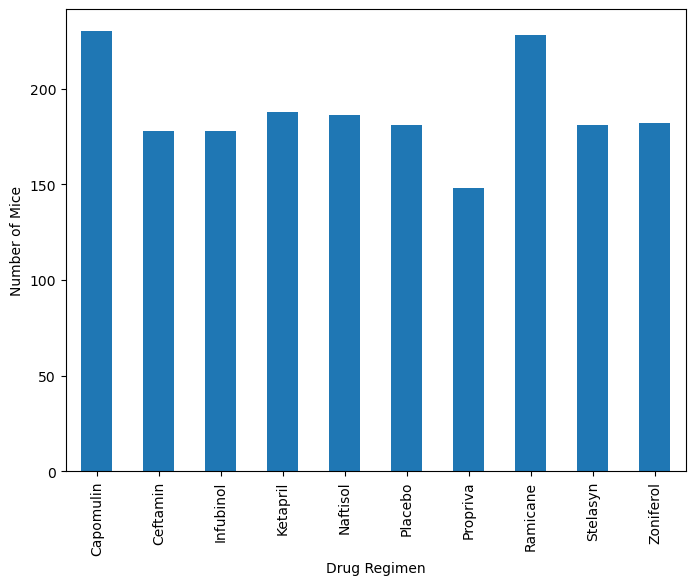

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_mice_count = clean_data.groupby("Drug Regimen")
count_mice_regimen = regimen_mice_count["Mouse ID"].count()
clean_chart = count_mice_regimen.plot(kind="bar", figsize=(8,6))
clean_chart.set_xlabel("Drug Regimen")
clean_chart.set_ylabel("Number of Mice")
plt.show()

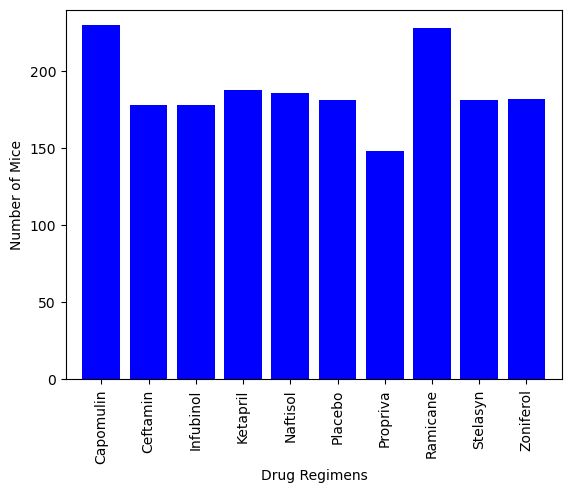

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_mice_count = clean_data.groupby("Drug Regimen")
count_mice_regimen = regimen_mice_count["Mouse ID"].count()
drug_regimens = count_mice_regimen.index.tolist()

x_axis = range(len(regimen_mice_count))
plt.bar(x_axis, count_mice_regimen, color="b", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimens, rotation=90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(count_mice_regimen)+10)
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice")
plt.show()


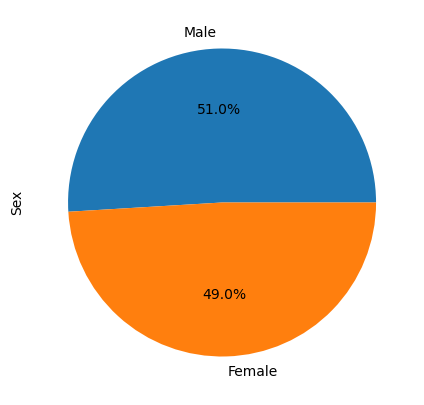

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = clean_data["Sex"].value_counts()
mouse_gender.plot(kind="pie", figsize=(5,5), autopct='%1.1f%%')

plt.ylabel("Sex")
plt.show()


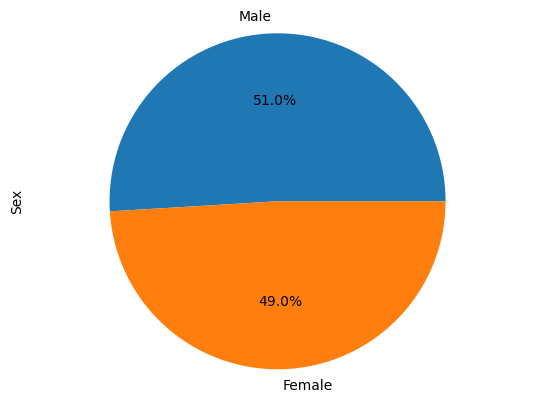

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = clean_data["Sex"].value_counts()
genders = mouse_gender.index.tolist()

plt.pie(mouse_gender, labels=genders, autopct="%1.1f%%", startangle=0)

plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specific_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
limited_regimens = clean_data[clean_data["Drug Regimen"].isin(specific_drugs)]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = limited_regimens.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor = pd.merge(clean_data, greatest_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


In [88]:
# Put treatments into a list for for loop (and later for plot labels)
specific_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in specific_drugs:
    tumor_data = final_tumor[final_tumor["Drug Regimen"] == drug]
    tumor_volume[drug] = tumor_data["Tumor Volume (mm3)"]
    quartiles = tumor_volume[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq


    print(f"The lower quartile of tumor size is: {lowerq}")
    print(f"The upper quartile of tumor size is: {upperq}")
    print(f"The interquartile range of tumor size is: {iqr}")
    print(f"The the median of tumor size is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    

The lower quartile of tumor size is: 32.37735684
The upper quartile of tumor size is: 40.1592203
The interquartile range of tumor size is: 7.781863460000004
The the median of tumor size is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of tumor size is: 31.56046955
The upper quartile of tumor size is: 40.65900627
The interquartile range of tumor size is: 9.098536719999998
The the median of tumor size is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of tumor size is: 54.04860769
The upper quartile of tumor size is: 65.52574285
The interquartile range of tumor size is: 11.477135160000003
The the median of tumor size is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of tumor size is: 48.72207785
The upper quartile of tumor size is: 64.29983003
Th

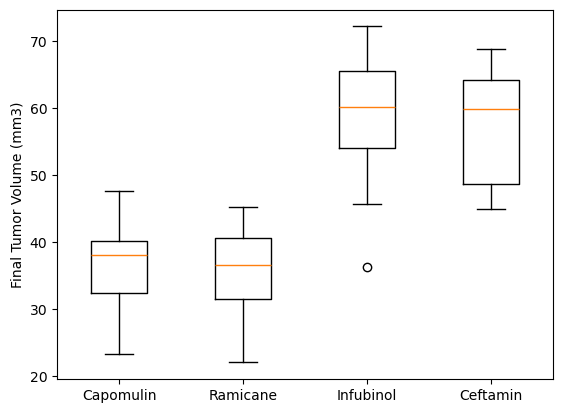

In [101]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
specific_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volume.values(), labels=specific_drugs)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()


## Line and Scatter Plots

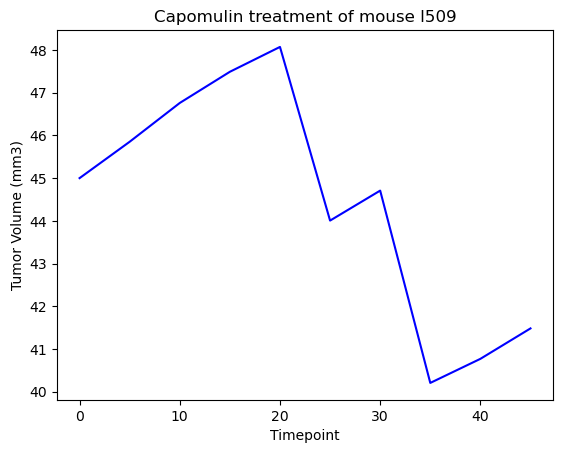

In [116]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "l509"
single_mouse = clean_data[clean_data['Mouse ID'] == mouse]

fig1, ax1 = plt.subplots()
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'], color='b')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse}')
plt.grid(False)
plt.show()

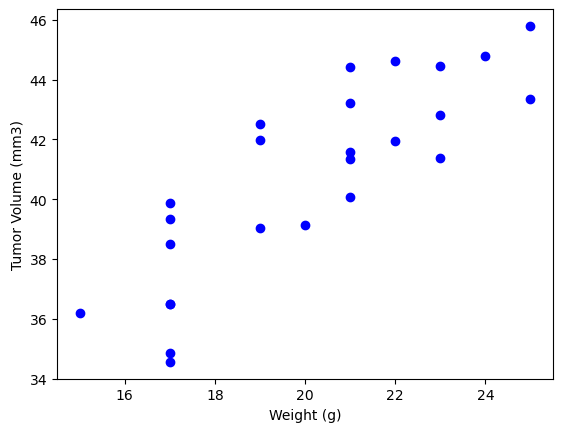

In [140]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug = "Capomulin"
capo_data = clean_data.loc[clean_data['Drug Regimen'] == drug]

mean_tumor_volume = capo_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weights = capo_data.groupby("Mouse ID")["Weight (g)"].mean()

fig1, ax1 = plt.subplots()
plt.scatter(weights, mean_tumor_volume, color='b')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(False)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


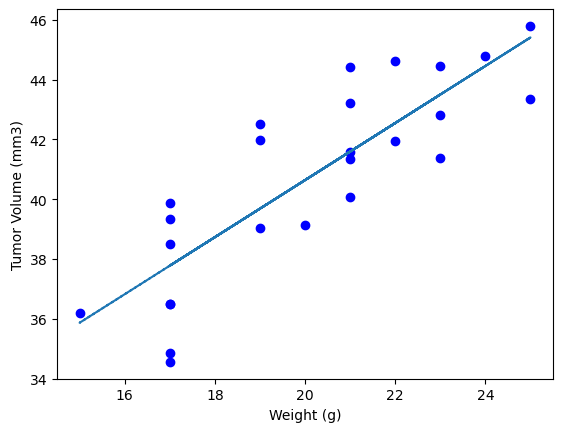

In [147]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
drug = "Capomulin"
capo_data = clean_data.loc[clean_data['Drug Regimen'] == drug]

mean_tumor_volume = capo_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weights = capo_data.groupby("Mouse ID")["Weight (g)"].mean()

correlation = st.pearsonr(mean_tumor_volume, weights)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


x_values = weights
y_values = mean_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(weights, mean_tumor_volume, color='b')
plt.plot(weights, regress_values, "--")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(False)
plt.show()